## Importing the Requried library

In [1]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import img_to_array
from sklearn.model_selection import train_test_split
from keras.layers import Flatten,Dense
from keras.models import Model
import matplotlib.pyplot as plt
import hashlib
from PIL import Image
import os
import io
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
from PyQt5.QtWidgets import QApplication, QFileDialog
import sys

## Converting a file into the equvalant image

Selected file path: C:/Users/Rajkumar Maity/Downloads/arduino-ide_2.0.4_Windows_64bit.exe


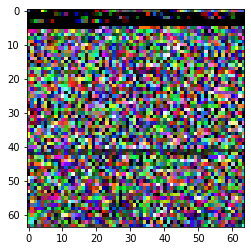

In [2]:
def read_image(file_path, img_size):
    with open(file_path, 'rb') as file:
        data = file.read()
    img = Image.frombytes('RGB', (img_size, img_size), data)
    img_array = np.asarray(img)
    resized_img = img.resize((128,128))
    img_bytes = io.BytesIO()
    resized_img.save(img_bytes, format='JPEG')
    img_bytes = img_bytes.getvalue()
    plt.imshow(img_array)
    plt.show()
    return resized_img, img_bytes

app = QApplication(sys.argv)
file_dialog = QFileDialog()
file_dialog.setFileMode(QFileDialog.ExistingFile)
if file_dialog.exec_() == QFileDialog.Accepted:
    file_path = file_dialog.selectedFiles()[0]
    print("Selected file path:", file_path)
img_size = 64
resized_img, jpeg_bytes = read_image(file_path, img_size)


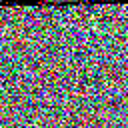

In [18]:
resized_img

## Importing the dataset

In [ ]:
x=np.zeros((1099,160,160,3))
y=np.zeros((1099))


In [3]:
path=r"C:\Users\Rajkumar Maity\Documents\UNIVERSITY PROJECTS\AGNI\malware_images\Testing Data"
clas=['malicious','non_malicious']

In [4]:
for nam in clas:
    print(nam)

malicious
non_malicious


In [67]:
# count=0
# label=0
# for nam in clas:
# #     print(nam)
#     for root, dirs, files in os.walk(os.path.join(path,nam), topdown=False):
#        for name in files:
#         img_path=os.path.join(root, name)
#         if(img_path.endswith('.png')):
#             img=cv2.imread(img_path)
#             resiz_img=cv2.resize(img,(160,160)).astype(np.float32) / 255.0
# #             resiz_img=img_to_array(resiz_img)
#             x[count]=resiz_img
#             y[count]=label
#             count+=1
#     label=1

In [43]:
count

1099

## Compress and Load the dataset

In [8]:
# np.savez_compressed(path+'/x_160',x)
# np.savez_compressed(path+'/y_160',y)
x=np.load(path+'/x_128.npz')
x=x.f.arr_0

y=np.load(path+'/y_128.npz')
y=y.f.arr_0

## Showing the images after loading

In [26]:
for i in range(610,620):
    print("label: ",y[i])
    cv2.imshow('img',x[i])
    cv2.waitKey(0)
    cv2.destroyAllWindows()

label:  0.0
label:  1.0
label:  1.0
label:  1.0
label:  1.0
label:  1.0
label:  1.0
label:  1.0
label:  1.0
label:  1.0


## Spliting the datset into training and testing dataset

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
x_train.shape

(879, 128, 128, 3)

In [11]:
y_train.shape

(879,)

In [12]:
from tensorflow.keras.applications import ResNet50 as trans_model

In [13]:
input_size=[128,128,3]
resnet=trans_model(input_shape=input_size,weights='imagenet',include_top=False)
for layer in resnet.layers:
  layer.trainable=False
x=Flatten()(resnet.output)
# keras.layers.Dropout(0.5),
prediction=Dense(2,activation='relu')(x)
model=Model(inputs=resnet.input,outputs=prediction)
model.summary()
model.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']         

 conv2_block3_2_conv (Conv2D)   (None, 32, 32, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 32, 32, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 32, 32, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 32, 32, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 16, 16, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 16, 16, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 16, 16, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 16, 16, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_2_conv (Conv2D)   (None, 8, 8, 256)    590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 8, 8, 256)   1024        ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block2_2_relu[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block5_2_relu (Activatio  (None, 8, 8, 256)   0           ['conv4_block5_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_3_conv (Conv2D)   (None, 8, 8, 1024)   263168      ['conv4_block5_2_relu[0][0]']    
                                                                                                  
 conv4_block5_3_bn (BatchNormal  (None, 8, 8, 1024)  4096        ['conv4_block5_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_add (Add)         (None, 8, 8, 1024)   0           ['conv4_block4_out[0][0]',       
                                                                  'conv4_block5_3_bn[0][0]']      
          

 conv5_block2_2_relu (Activatio  (None, 4, 4, 512)   0           ['conv5_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 4, 4, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, 4, 4, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 4, 4, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
          

In [15]:
history=model.fit(x_train,y_train,validation_split=0.1,epochs=8)

Epoch 1/8
25/25 [==============================] - 4s 155ms/step - loss: 8.3283 - accuracy: 0.1606 - val_loss: 9.1842 - val_accuracy: 0.1705
Epoch 2/8
25/25 [==============================] - 2s 76ms/step - loss: 8.3283 - accuracy: 0.1568 - val_loss: 9.1842 - val_accuracy: 0.1705
Epoch 3/8
25/25 [==============================] - 2s 75ms/step - loss: 8.3283 - accuracy: 0.1568 - val_loss: 9.1842 - val_accuracy: 0.1705
Epoch 4/8
25/25 [==============================] - 2s 76ms/step - loss: 8.3283 - accuracy: 0.1568 - val_loss: 9.1842 - val_accuracy: 0.1705
Epoch 5/8
25/25 [==============================] - 2s 76ms/step - loss: 8.3283 - accuracy: 0.1568 - val_loss: 9.1842 - val_accuracy: 0.1705
Epoch 6/8
25/25 [==============================] - 2s 76ms/step - loss: 8.3283 - accuracy: 0.1568 - val_loss: 9.1842 - val_accuracy: 0.1705
Epoch 7/8
25/25 [==============================] - 2s 76ms/step - loss: 8.3283 - accuracy: 0.1568 - val_loss: 9.1842 - val_accuracy: 0.1705
Epoch 8/8
25/25 [==

In [ ]:
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [17]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 174ms/step - loss: 8.7337 - accuracy: 0.1500


[8.733654975891113, 0.15000000596046448]

In [5]:
# model.save(r"C:\Users\Rajkumar Maity\Documents\UNIVERSITY PROJECTS\AGNI\Model\mal_clas.h5")
from tensorflow.keras.models import load_model
model=load_model(r"C:\Users\Rajkumar Maity\Documents\UNIVERSITY PROJECTS\AGNI\Model\mal_clas.h5")

In [6]:

crop_img=img_to_array(resized_img)
crop_img = cv2.resize(crop_img, (128, 128)).astype("float") / 255.0
crop_img = np.expand_dims(crop_img, axis=0)
#prediction one th face image
out=model.predict(crop_img)[0]
acc=np.max(out)
result=clas[np.argmax(out)]
acc=int(round(acc*10,2))
print("Result: ",result)
print("Acc: ",acc,"%")

1/1 [==============================] - 1s 1s/step
Result:  non_malicious
Acc:  65 %


In [27]:
out

array([6.439903, 6.504869], dtype=float32)

Converting a Raw EXE file to it's Equvalent Binary Image

Selected file path: C:/Users/Rajkumar Maity/Downloads/OBS-VirtualCam2.0.4-Installer.exe


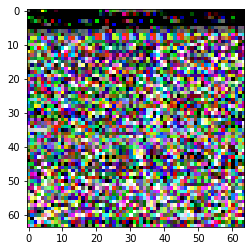

1/1 [==============================] - 7s 7s/step
Result:  non_malicious


In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import img_to_array
from sklearn.model_selection import train_test_split
from keras.layers import Flatten,Dense
from keras.models import Model
import matplotlib.pyplot as plt
from PIL import Image
import os
import io
import numpy as np
import matplotlib.pyplot as plt
from tkinter import filedialog
from PyQt5.QtWidgets import QApplication, QFileDialog
import sys
from tensorflow.keras.models import load_model


def read_image(file_path, img_size):
    with open(file_path, 'rb') as file:
        data = file.read()
    img = Image.frombytes('RGB', (img_size, img_size), data)
    img_array = np.asarray(img)
    resized_img = img.resize((128,128))
    img_bytes = io.BytesIO()
    resized_img.save(img_bytes, format='JPEG')
    img_bytes = img_bytes.getvalue()
    plt.imshow(img_array)
    plt.show()
    return resized_img, img_bytes

# Example usage
app = QApplication(sys.argv)
file_dialog = QFileDialog()
file_dialog.setFileMode(QFileDialog.ExistingFile)
if file_dialog.exec_() == QFileDialog.Accepted:
    file_path = file_dialog.selectedFiles()[0]
    print("Selected file path:", file_path)
img_size = 64
resized_img, jpeg_bytes = read_image(file_path, img_size)

model_path=r"C:\Users\Rajkumar Maity\Documents\UNIVERSITY PROJECTS\AGNI\Model\mal_clas.h5"
clas=['malicious','non_malicious']
model=load_model(model_path)
crop_img=img_to_array(resized_img)
crop_img = cv2.resize(crop_img, (128, 128)).astype("float") / 255.0
crop_img = np.expand_dims(crop_img, axis=0)
#prediction one th face image
out=model.predict(crop_img)[0]
acc=np.max(out)
result=clas[np.argmax(out)]
acc=int(round(acc*10,2))
print("Result: ",result)
# print("Acc: ",acc,"%")